In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("census-income.csv",skipinitialspace=True) # Load the dataset and remove spaces from the columns

In [3]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Data Cleaning ###

In [4]:
data.rename(columns={'Unnamed: 14':"income"},inplace=True) # Renaming the last column as income

In [5]:
data.columns 

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [6]:
data.shape

(32561, 15)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
data=data.replace("?", np.nan) 

In [10]:
data.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [11]:
data=data.dropna() # drop all the rows containing "?"

In [12]:
# Removing the outliers from the data
Q1=data.select_dtypes(include="number").quantile(0.25)
Q3=data.select_dtypes(include="number").quantile(0.75)
IQR=Q3-Q1
IQR



age                   19.00
fnlwgt            120001.25
education-num          4.00
capital-gain           0.00
capital-loss           0.00
hours-per-week         5.00
dtype: float64

In [22]:
for col in data.columns:
  if data[col].dtypes=="number":
     Q1=data[col].quantile(0.25)
     Q3=data[col].quantile(0.75)
     IQR=Q1-Q3
     lower_bound=Q1 - 1.5 * IQR
     upper_bound=Q3 + 1.5 * IQR
     data=data[(data.age>=lower_bound)|(data.age<=upper_bound) ]

In [27]:
data.isna().sum()
data.shape

(30139, 15)

In [29]:
data.drop_duplicates(inplace=True) # Remove duplcate rows
data.shape

(30139, 15)

###EDA###

In [30]:
data.workclass.value_counts()

Private             22264
Self-emp-not-inc     2498
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64

In [46]:
# percentage of high school grads earning more than 50K
round((data[(data.education=="HS-grad")&(data.income==">50K")].shape[0]/len(data))*100,2)

5.36

In [ ]:
#  Calculate the mean of the “capital.gain” column grouped according to “workclass”.

In [31]:
data.groupby(["workclass"])["capital-gain"].mean()

workclass
Federal-gov          832.321315
Local-gov            829.230285
Private              880.727632
Self-emp-inc        4810.746741
Self-emp-not-inc    1913.900320
State-gov            684.306489
Without-pay          487.857143
Name: capital-gain, dtype: float64

In [33]:
male_details=data[(data.sex=='Male')&(data.income=='>50K')]
female_details=data[(data.sex=="Female")&(data.income=='>50K')]

 Calculate the percentage of people from the United States who are private employees and earn less than 50,000 annually.

In [34]:
round((data[(data["native-country"]=="United-States")&(data.workclass=="Private")&(data.income=="<=50K")].shape[0]/len(data))*100,2)

51.69

#### Data Visualizations ####

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


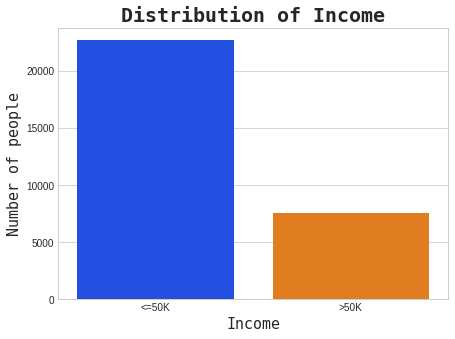

In [37]:
# Creating a barplot for 'Income'
import seaborn as sns
income = data['income'].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7, 5))
sns.barplot(income.index, income.values, palette='bright')

plt.title('Distribution of Income', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Income', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


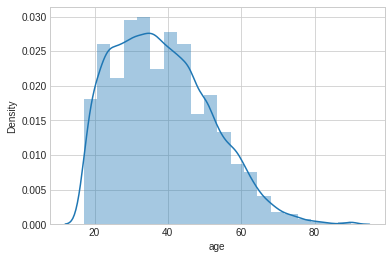

In [38]:
# Creating a distribution plot for age
#age = data['age'].value_counts()
sns.distplot(data['age'], bins=20);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


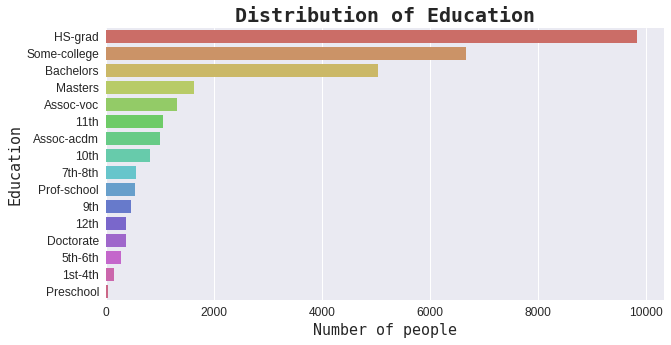

In [40]:
#Creating a barplot for education
edu = data['education'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(10, 5))
sns.barplot(edu.values, edu.index, palette='hls')
plt.title('Distribution of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


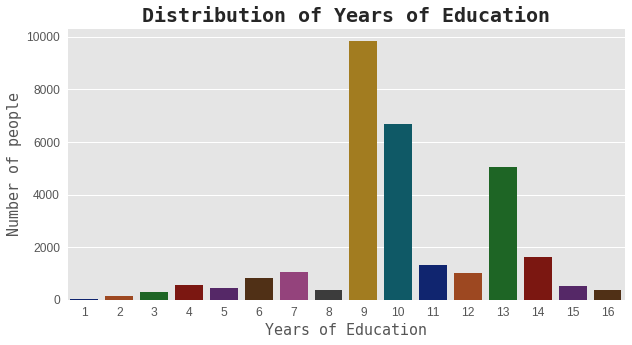

In [41]:
# Creating a bar plot for years of education

edu_num = data['education-num'].value_counts()

plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
sns.barplot(edu_num.index, edu_num.values, palette='dark')
plt.title('Distribution of Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

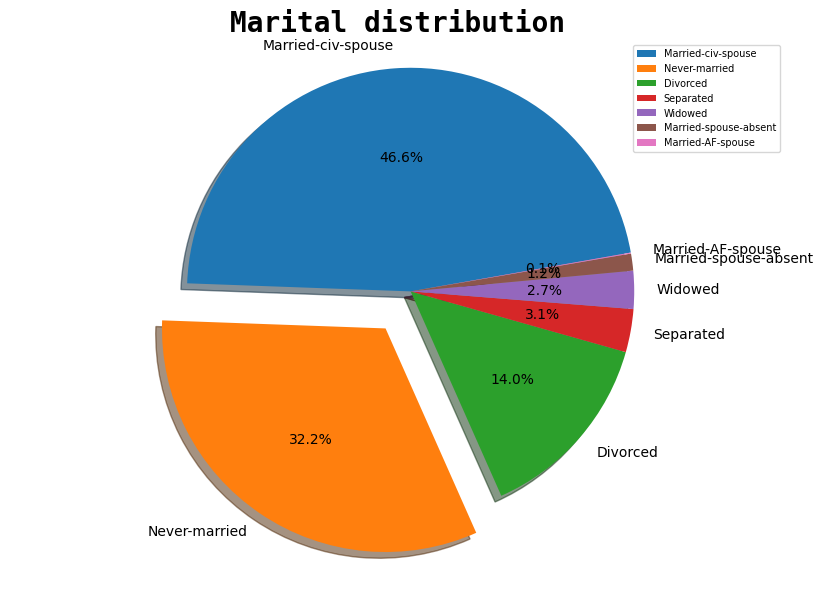

In [42]:
# Creating a pie chart for marital status

marital_status = data['marital-status'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(marital_status.values, labels=marital_status.index, startangle=10, explode=(
    0, 0.20, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


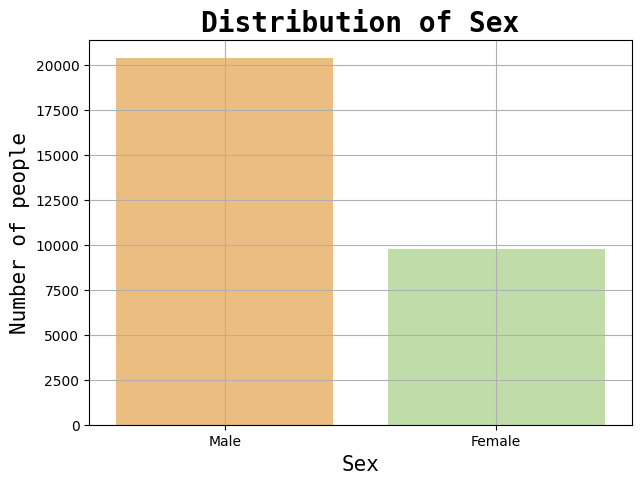

In [43]:
# Creating a bar plot for gender

sex = data['sex'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
sns.barplot(sex.index, sex.values,palette="Spectral")
plt.title('Distribution of Sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.grid()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


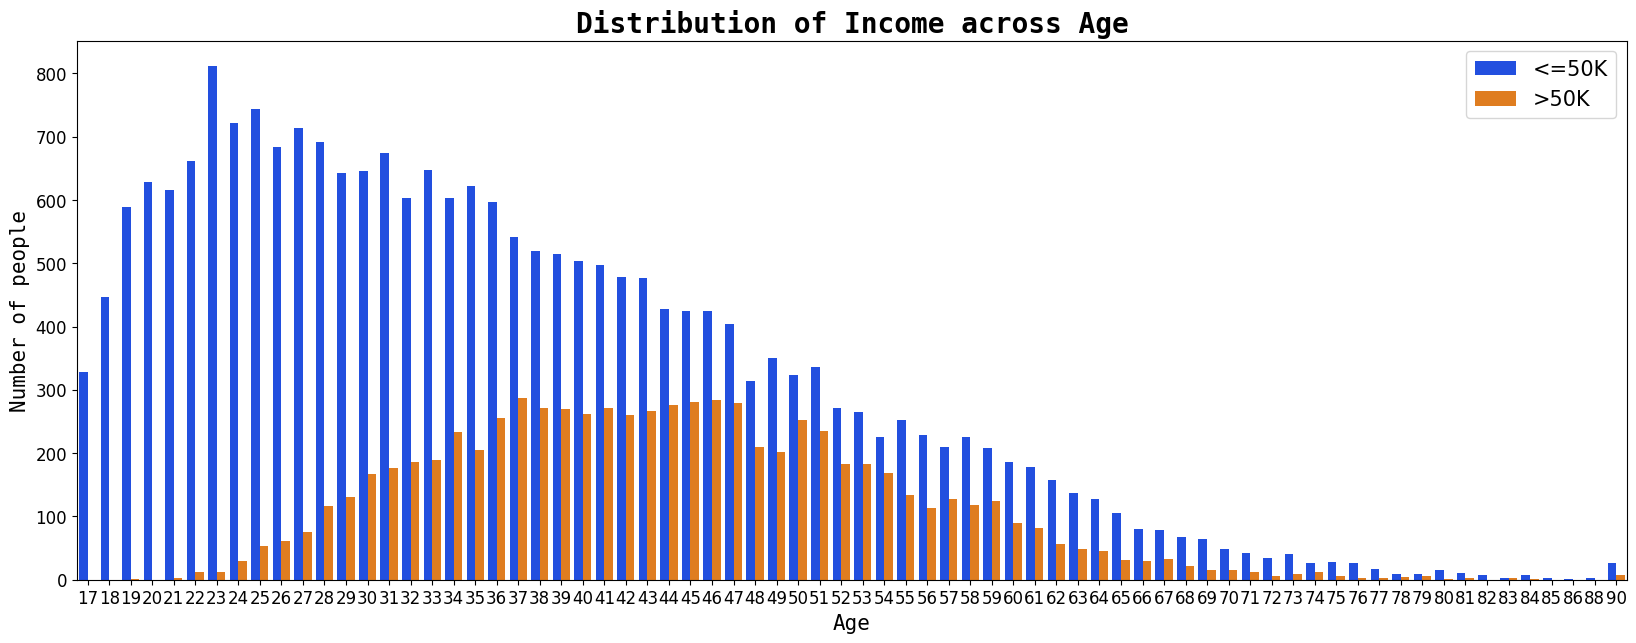

In [44]:
# Count the number of people with income > and <=50K across age
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(data['age'], hue=data['income'], palette = "bright")
plt.title('Distribution of Income across Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


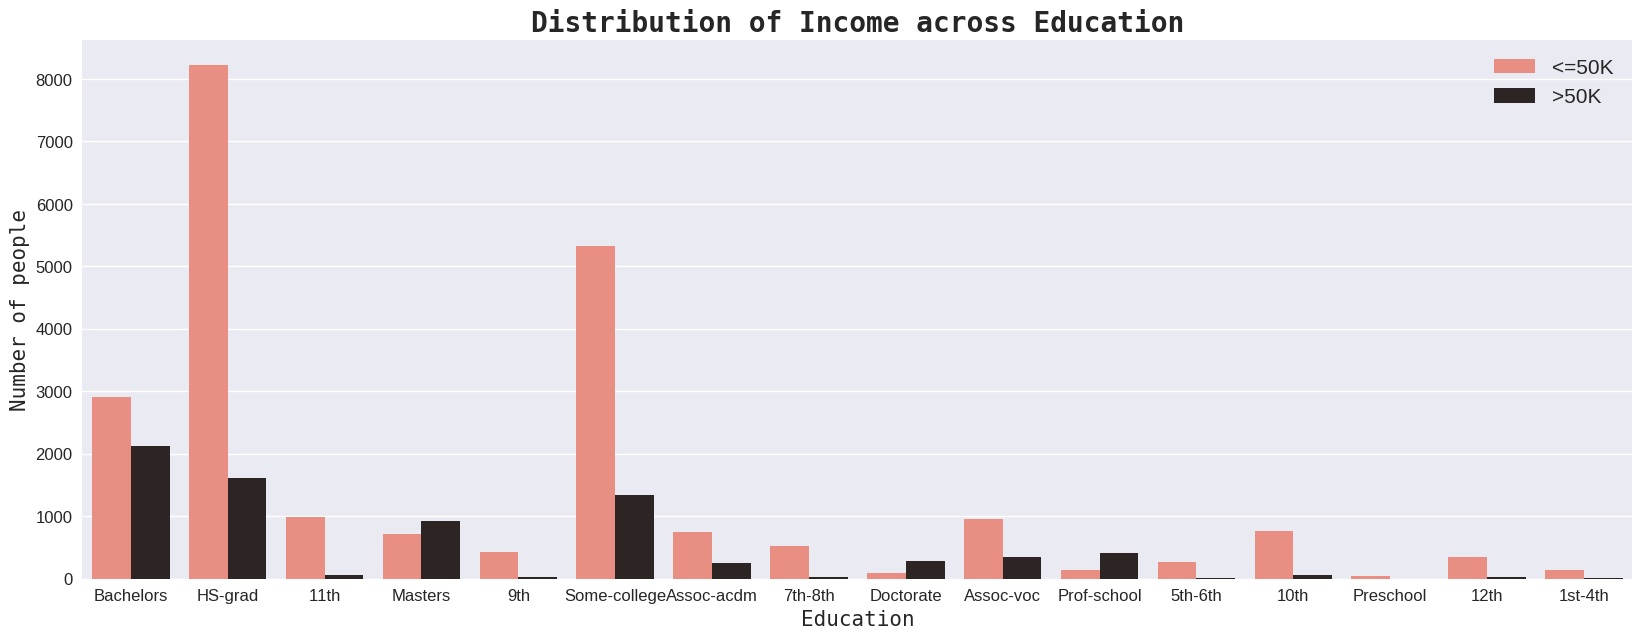

In [45]:
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(data['education'],
              hue=data['income'], palette='dark:salmon_r')
plt.title('Distribution of Income across Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


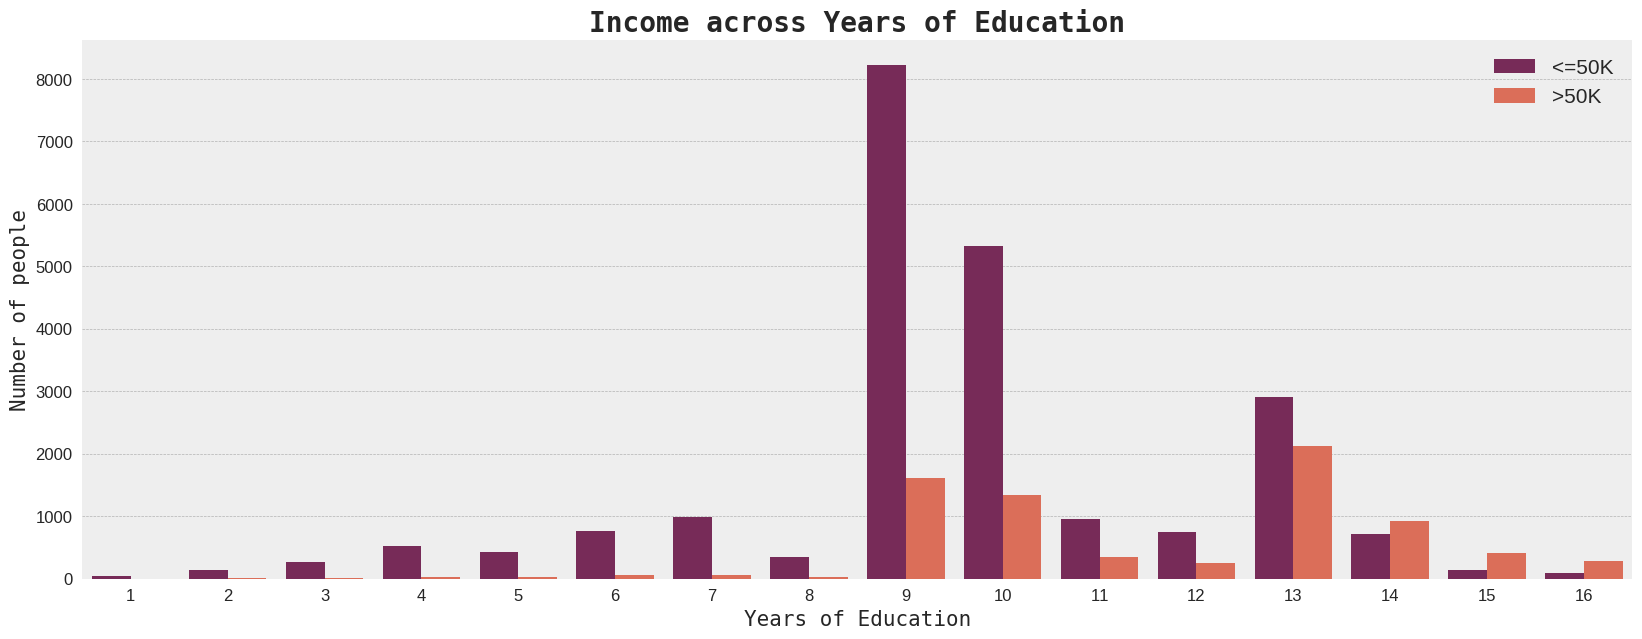

In [47]:
# Countplot of income across years of education

plt.style.use('bmh')
plt.figure(figsize=(20, 7))
sns.countplot(data['education-num'],
              hue=data['income'], palette="rocket")
plt.title('Income across Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.savefig('bi2.png')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


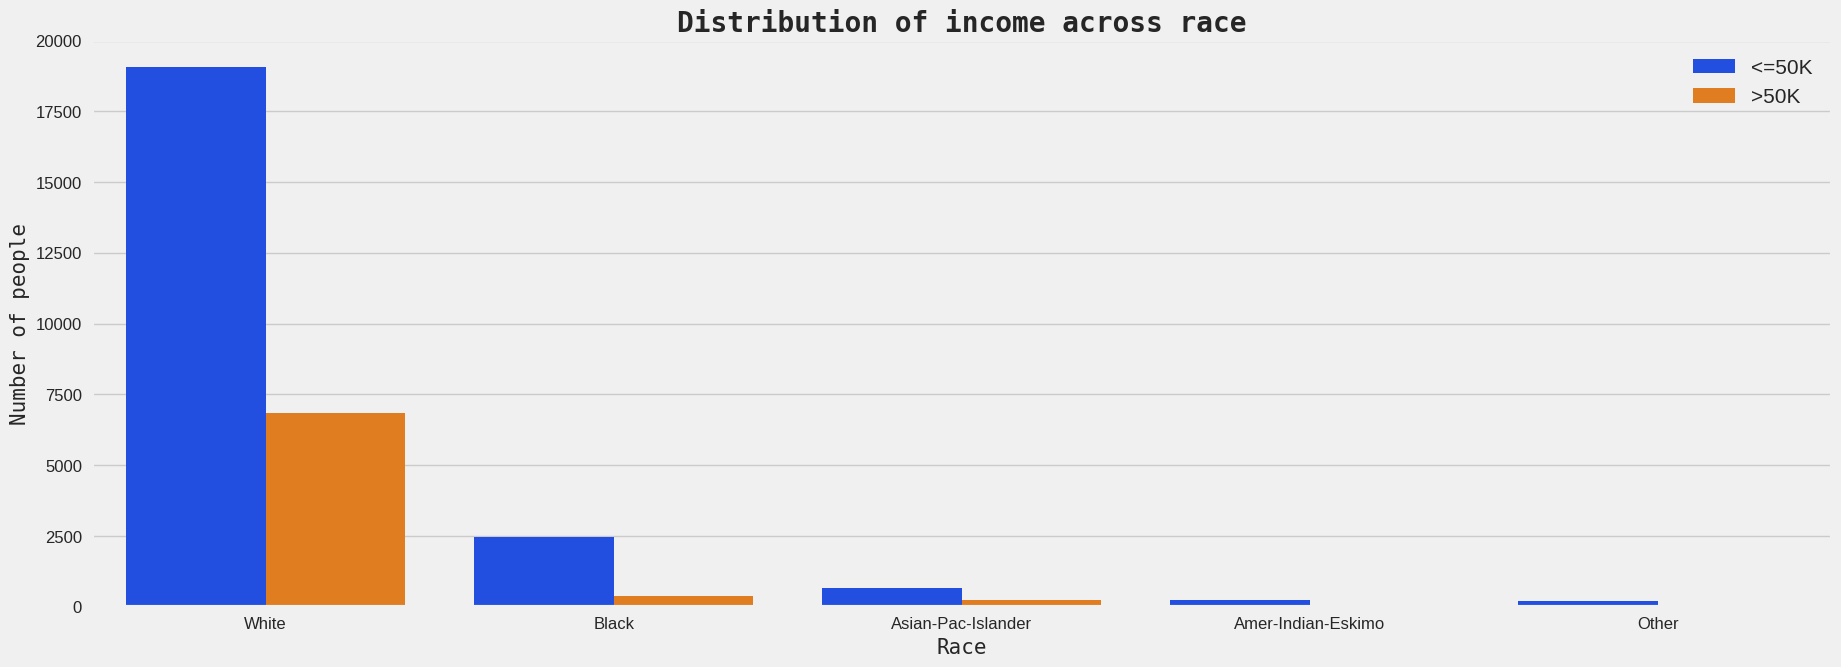

In [48]:
# Income across race

plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 7))
sns.countplot(data['race'], hue=data['income'], palette="bright")
plt.title('Distribution of income across race', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Race', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


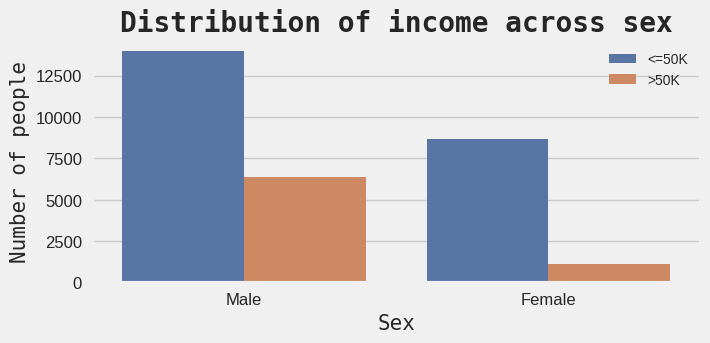

In [50]:
# Income across sex

#plt.style.use('fivethirtyeight')
plt.figure(figsize=(7, 3))
sns.countplot(data['sex'], hue=data['income'], palette="deep")
plt.title('Distribution of income across sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 10})
plt.savefig('bi3.png')
plt.show()

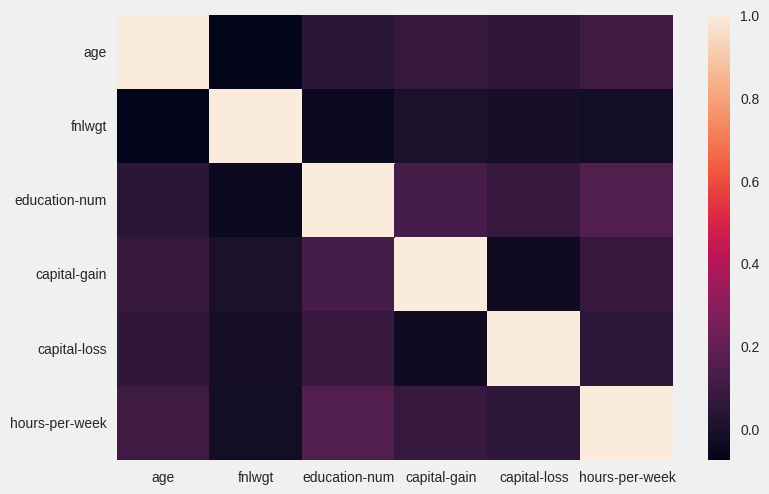

In [51]:
corr = data.corr()
sns.heatmap(corr)

Linear Regression: a) Build a simple linear regression model as follows:

● Divide the dataset into training and test sets in 70:30 ratio. ● Build a linear model on the test set where the dependent variable is “hours.per.week” and the independent variable is “education.num”. ● Predict the values on the train set and find the error in prediction. ● Find the root-mean-square error (RMSE).

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
x=data[['education-num']]
y=data[['hours-per-week']]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=42)

In [ ]:
lin_reg=LinearRegression()

In [ ]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=lin_reg.predict(x_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)

In [ ]:
mse

140.95092485430635

In [ ]:
rmse=np.sqrt(mse)
rmse

11.872275470789344

Logistic Regression: a) Build a simple logistic regression model as follows: ● Divide the dataset into training and test sets in 65:35 ratio. ● Build a logistic regression model where the dependent variable is “X”(yearly income) and the independent variable is “occupation”. ● Predict the values on the test set. ● Build a confusion matrix and find the accuracy. b)Build a multiple logistic regression model as follows: ● Divide the dataset into training and test sets in 80:20 ratio. ● Build a logistic regression model where the dependent variable is “X”(yearly income) and independent variables are “age”, “workclass”, and “education”. ● Predict the values on the test set. ● Build a confusion matrix and find the accuracy.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [ ]:
for col in data.columns:
  if data[col].dtype=="object":
    encoder=LabelEncoder()
    data[col]=encoder.fit_transform(data[col])

In [ ]:
x = data[["occupation"]]
y = data[["income"]]


In [ ]:
x=pd.get_dummies(x)
y = y.replace({'<=50K': 0, '>50K': 1})

In [ ]:
y.value_counts()  # The data is highly imbalanced

income
0         22654
1          7508
dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

oversampling=SMOTE(random_state=42)
oversampling.fit(x,y)


SMOTE(random_state=42)

In [ ]:
x_resampled,y_resampled=oversampling.fit_resample(x,y)

In [ ]:
y_resampled.value_counts() # Balanced Data

income
0         22654
1         22654
dtype: int64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=.35,random_state=42)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.35,random_state=42)

In [ ]:
logit=LogisticRegression()

In [ ]:
logit.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_pred=logit.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,y_pred)

array([[5200, 2687],
       [2409, 5562]])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.85      7882
           1       0.00      0.00      0.00      2675

    accuracy                           0.75     10557
   macro avg       0.37      0.50      0.43     10557
weighted avg       0.56      0.75      0.64     10557



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Multivariate Logistic Regression


In [ ]:
x = data.loc[:,["age","workclass","education"]]
y = data[["income"]]
y = y.replace({'<=50K': 0, '>50K': 1})

In [ ]:
x=pd.get_dummies(x)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [ ]:
logit.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_pred=logit.predict(x_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[4503,    0],
       [1530,    0]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.85      4503
           1       0.00      0.00      0.00      1530

    accuracy                           0.75      6033
   macro avg       0.37      0.50      0.43      6033
weighted avg       0.56      0.75      0.64      6033



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree: a) Build a decision tree model as follows:
● Divide the dataset into training and test sets in 70:30 ratio. ● Build a decision tree model where the dependent variable is “X”(Yearly Income) and the rest of the variables as independent variables. ● Predict the values on the test set. ● Build a confusion matrix and calculate the accuracy.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder, LabelEncoder


In [ ]:
# education Category
data.education = data.education.replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school')
data.education = data.education.replace('HS-grad', 'high school')
data.education = data.education.replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher')
data.education = data.education.replace('Bachelors', 'undergrad')
data.education = data.education.replace('Masters', 'grad')
data.education = data.education.replace('Doctorate', 'doc')

In [ ]:
#martial status
data['marital-status']= data['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married')
data['marital-status']= data['marital-status'].replace(['Never-married'], 'not-married')
data['marital-status']= data['marital-status'].replace(['Divorced', 'Separated','Widowed',
                                                   'Married-spouse-absent'], 'other')

In [ ]:
for col in data.columns:
    if data[col].dtypes == 'object':
        encoder = LabelEncoder()
        data[col] = encoder.fit_transform(data[col])

In [ ]:
x = data.drop("income", axis=1)
y = data[["income"]]
y = y.replace({'<=50K': 0, '>50K': 1})

In [ ]:
DT=DecisionTreeClassifier()
DT.fit(x,y)

DecisionTreeClassifier()

In [ ]:
DT.feature_importances_


array([0.12151279, 0.03304169, 0.20508832, 0.00664654, 0.12289646,
       0.20183845, 0.0532257 , 0.01141764, 0.01198474, 0.00849856,
       0.10604341, 0.03676415, 0.06645413, 0.01458742])

In [ ]:
feature_importance=pd.DataFrame(columns=["features","importances"])

In [ ]:
feature_importance.features=data.columns[:-1]

In [ ]:
feature_importance.importances=DT.feature_importances_


In [ ]:
feature_importance.sort_values("importances")

,features,importances
3,education,0.006647
9,sex,0.008499
7,relationship,0.011418
8,race,0.011985
13,native-country,0.014587
1,workclass,0.033042
11,capital-loss,0.036764
6,occupation,0.053226
12,hours-per-week,0.066454
10,capital-gain,0.106043


In [ ]:
x = x.drop(['workclass', 'education', 'race', 'sex','capital-loss', 'native-country'], axis=1)

In [ ]:
y.value_counts(normalize=True) # the data is highly imbalanced

income
0         0.751078
1         0.248922
dtype: float64

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
oversampling = SMOTE(random_state=42) # oversampling the undersampled class --income<=50K


In [ ]:
oversampling.fit(x,y)

SMOTE(random_state=42)

In [ ]:
X_resampled, Y_resampled = oversampling.fit_resample(x, y)

In [ ]:
X_resampled

,age,fnlwgt,education-num,marital-status,occupation,relationship,capital-gain,hours-per-week
0,39,77516,13,1,0,1,2174,40
1,50,83311,13,0,3,0,0,13
2,38,215646,9,2,5,1,0,40
3,53,234721,7,0,5,0,0,40
4,28,338409,13,0,9,5,0,40
...,...,...,...,...,...,...,...,...
45303,50,312473,9,0,3,0,0,42
45304,42,258862,9,0,0,3,0,36
45305,42,57306,9,0,2,0,0,53
45306,53,109391,12,0,3,4,0,35


In [ ]:
Y_resampled.value_counts(normalize=True)

income
0         0.5
1         0.5
dtype: float64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X_resampled,Y_resampled,test_size=0.3,random_state=42)

In [ ]:
DT=DecisionTreeClassifier()

In [ ]:
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=DT.predict(x_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[5532, 1252],
       [1161, 5648]])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
accuracy_score(y_test,y_pred)

0.8224821599352607

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      6784
           1       0.82      0.83      0.82      6809

    accuracy                           0.82     13593
   macro avg       0.82      0.82      0.82     13593
weighted avg       0.82      0.82      0.82     13593



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X_resampled,Y_resampled,test_size=0.2,random_state=42)

In [ ]:
rfc=RandomForestClassifier(n_estimators=300)

In [ ]:
rfc.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(n_estimators=300)

In [ ]:
y_pred=rfc.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.8647097770911498

In [ ]:
confusion_matrix(y_test,y_pred)

array([[3868,  674],
       [ 552, 3968]])